In [577]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import *
from sympy.stats import Normal, cdf
from matplotlib.ticker import MaxNLocator
import scipy.stats
pd.set_option('display.expand_frame_repr', False)

## Monte Carlo Solver

In [433]:
alpha = 1.1444307615618827
beta = 2.590929757651513

In [19]:
def getbetarandomvars (alpha, beta, number):
    random.seed()
    ans = []
    for i in range(number):
        ans.append(random.betavariate(alpha, beta))
    return ans

In [55]:
CA = pd.DataFrame(columns={"number", "mean", "second order moment"})
nums = np.linspace (100, 80000, 800).astype(int)
for ind in range (len(nums)) :
    num = nums[ind]
    rvs = np.array( getbetarandomvars (alpha, beta, num))
    CA.loc [ind] = [num, rvs.mean(), (rvs*rvs).mean()]

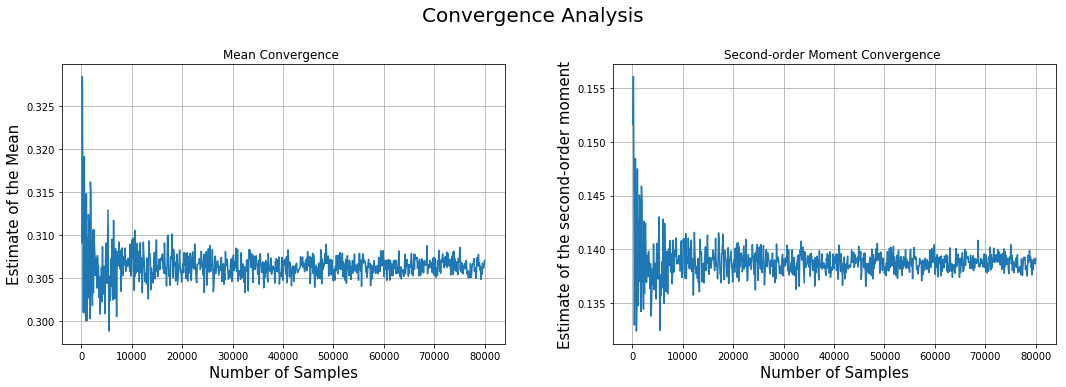

In [117]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 6));

ax1.plot(CA['number'].values, CA['mean'].values);
ax1.set_title('Mean Convergence ')
ax1.set_xlabel('Number of Samples',fontsize=15)
ax1.set_ylabel('Estimate of the Mean',fontsize=15)
ax1.grid(True)

ax2.plot(CA['number'].values, CA['second order moment'].values);
ax2.set_title('Second-order Moment Convergence ')
ax2.set_xlabel('Number of Samples',fontsize=15)
ax2.set_ylabel('Estimate of the second-order moment',fontsize=15)
ax2.grid(True)

fig.suptitle('Convergence Analysis',fontsize=20)
fig.tight_layout(pad=5.0)
fig.savefig(r"C:\DUKE\courses\Uncertainty Quantification\final project\convergence analysis.jpg", dpi = 300)

In [221]:
S = 1
K = 1
r = 0.0063
dT = 14/365
iv = Symbol('\sigma')
d1 = (log (S/K)+(r+iv*iv/2)*dT)/iv/sqrt(dT)
d2 = d1 - iv * sqrt(dT)
N = Symbol ('n')
N = Normal ('n', 0, 1)
C = S * simplify(cdf(N))(d1) - exp(-r * dT) * K * simplify(cdf(N))(d2) 

In [92]:
number = 20000
X = np.array(getbetarandomvars (alpha, beta, number))

In [122]:
number = 20000
X = np.array(getbetarandomvars (alpha, beta, number))
MC = pd.DataFrame(columns={"ramdom variable", "realization"})
for ind in range (number) :
    rv = X[ind]
    realization = float(C.subs(iv,rv).evalf())
    MC.loc [ind] = [rv, realization]

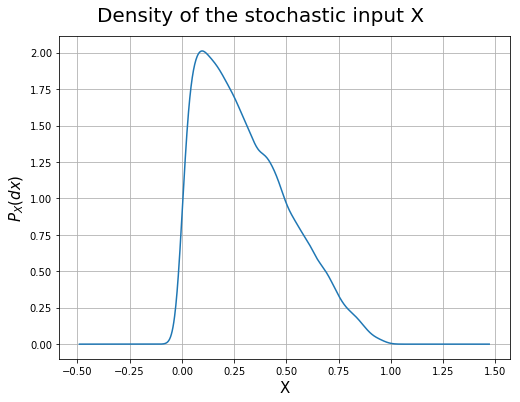

In [325]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 6));
ax = MC['ramdom variable'].plot.kde()
ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('$P_X(dx)$',fontsize=15)
ax.grid(True)
fig.suptitle('Density of the stochastic input X',fontsize=20)
fig.tight_layout(pad=3.5)
fig.savefig(r"C:\DUKE\courses\Uncertainty Quantification\final project\MC solver X pdf.jpg", dpi = 300)

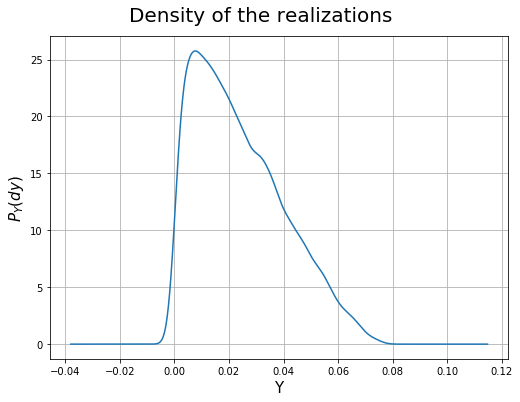

In [324]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 6));
ax = MC['realization'].plot.kde()
ax.set_xlabel('Y',fontsize=15)
ax.set_ylabel('$P_Y(dy)$',fontsize=15)
ax.grid(True)
fig.suptitle('Density of the realizations',fontsize=20)
fig.tight_layout(pad=3.5)
fig.savefig(r"C:\DUKE\courses\Uncertainty Quantification\final project\MC solver Y pdf.jpg", dpi = 300)

## Stochastic Modeling Through Series Expansions

Jacobi Polynomials

In [687]:
alpha = 1.1444307615618827
beta = 2.590929757651513
i = Symbol('i')
x = Symbol('x')
m = Symbol('m')
J = gamma(alpha+i)/factorial(i)/gamma(alpha+beta+i-1)*Sum(binomial(i,m)*gamma(alpha+beta+i+m-1)/gamma(alpha+m)*((x-1)/2)**m,(m,0,i)).doit()

In [606]:
# weight function
w = (1-x)**(alpha-1) * (1+x)**(beta-1)
# normalization factor
n = sqrt(gamma(i+alpha)*gamma(i+beta)/(2*i+alpha+beta-1)/gamma(i+alpha+beta-1)/factorial(i)/(gamma(alpha)*gamma(beta)/gamma(alpha+beta)))
# normalization factor for Jacobi polynomial inner product
nJ = sqrt(2**(alpha+beta-1)/(2*i+alpha+beta-1)*gamma(i+alpha)*gamma(i+beta)/gamma(i+alpha+beta-1)/factorial(i))

Check Jacobi polynomials properties

In [689]:
check = pd.DataFrame(np.zeros((5,5)))
for ii in range(5):
    for jj in range(5):
        ans=0
        for xx in np.linspace(-1,1,2001):
            ans+=((J/nJ).subs(i,ii)*(J/nJ).subs(i,jj)*w).subs(x,xx).evalf()*0.001
        check.iloc[ii,jj]=ans
print(check)

                       0                      1                      2                      3                      4
0      0.999789419002016  -0.000304472239597669  -0.000383338867566917  -0.000453670196368348  -0.000518151339530541
1  -0.000304472239597669      0.999559769606514  -0.000554252913307230  -0.000655958381653051  -0.000749164531746407
2  -0.000383338867566917  -0.000554252913307230      0.999302170885729  -0.000825841774924408  -0.000943248442348874
3  -0.000453670196368348  -0.000655958381653051  -0.000825841774924408      0.999022591974159   -0.00111624878145781
4  -0.000518151339530541  -0.000749164531746407  -0.000943248442348874   -0.00111624878145781      0.998725008919918


Check the normalization

In [690]:
check = pd.DataFrame(np.zeros((5,5)))
for ii in range(5):
    for jj in range(5):
        ans=0
        for xx in np.linspace(-1,1,2001):
            ans+=((J/n).subs(i,ii)*(J/n).subs(i,jj)*0.5*P.subs(x,(1-x)/2)).subs(x,xx).evalf()*0.001
        check.iloc[ii,jj]=ans
print(check)

                       0                      1                      2                      3                      4
0      0.999789419002016  -0.000304472239597765  -0.000383338867566863  -0.000453670196368365  -0.000518151339530545
1  -0.000304472239597765      0.999559769606514  -0.000554252913307099  -0.000655958381653016  -0.000749164531746435
2  -0.000383338867566863  -0.000554252913307099      0.999302170885729  -0.000825841774924314  -0.000943248442348878
3  -0.000453670196368365  -0.000655958381653016  -0.000825841774924314      0.999022591974159   -0.00111624878145791
4  -0.000518151339530545  -0.000749164531746435  -0.000943248442348878   -0.00111624878145791      0.998725008919918


h(x)

In [522]:
S = 1
K = 1
r = 0.0063
dT = 14/365
x = Symbol('x')
d1 = (log (S/K)+(r+x*x/2)*dT)/x/sqrt(dT)
d2 = d1 - x * sqrt(dT)
N = Symbol ('n')
N = Normal ('n', 0, 1)
h = S * simplify(cdf(N))(d1) - exp(-r * dT) * K * simplify(cdf(N))(d2) 

P_X(dx) for Beta distribution

In [608]:
P = x**(alpha-1) * (1-x)**(beta-1)/gamma(alpha)/gamma(beta)*gamma(alpha+beta)

Check mapping

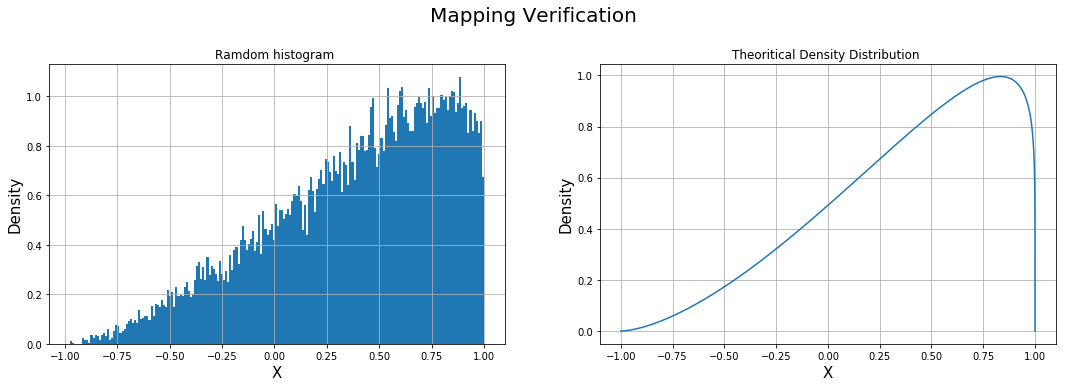

In [646]:
X = np.array(getbetarandomvars (alpha, beta, 20000))
X = 1-X*2
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(16, 6));
pdf_mapped = [0.5*P.subs(x,(1-x)/2).subs(x,xx) for xx in np.linspace(-1,1,20000)]

ax1.hist(X, 200, density=1);
ax1.set_title('Ramdom histogram ')
ax1.set_xlabel('X',fontsize=15)
ax1.set_ylabel('Density',fontsize=15)
ax1.grid(True)

ax2.plot(np.linspace(-1,1,20000), pdf_mapped);
ax2.set_title('Theoritical Density Distribution ')
ax2.set_xlabel('X',fontsize=15)
ax2.set_ylabel('Density',fontsize=15)
ax2.grid(True)

fig.suptitle('Mapping Verification',fontsize=20)
fig.tight_layout(pad=5.0)
fig.savefig(r"C:\DUKE\courses\Uncertainty Quantification\final project\mapping verification.jpg", dpi = 300)

In [627]:
X = np.array(getbetarandomvars (alpha, beta, 2000))
X = 1-2*X

Then integrate from 0 to 1 to find yi.

In [635]:
yi = []
for ii in range(5):
    ans=0
    for xx in np.linspace(-1,1,2001):
        ans+=(h.subs(x,(1-x)/2)*(J/n).subs(i,ii)*0.5*P.subs(x,(1-x)/2)).subs(x,xx).evalf()*0.001
    yi.append(ans)

In [629]:
yi

[0.0542393444813036,
 -0.115640573811862,
 0.142271972338891,
 -0.145694613572554,
 0.143758197099776]

In [653]:
Poly0 = yi[0]*(J/n).subs(i,0)
Poly1 = yi[0]*(J/n).subs(i,0)+yi[1]*(J/n).subs(i,1)
Poly2 = yi[0]*(J/n).subs(i,0)+yi[1]*(J/n).subs(i,1)+yi[2]*(J/n).subs(i,2)
Poly3 = yi[0]*(J/n).subs(i,0)+yi[1]*(J/n).subs(i,1)+yi[2]*(J/n).subs(i,2)+yi[3]*(J/n).subs(i,3)
Poly4 = yi[0]*(J/n).subs(i,0)+yi[1]*(J/n).subs(i,1)+yi[2]*(J/n).subs(i,2)+yi[3]*(J/n).subs(i,3)+yi[4]*(J/n).subs(i,4)
Poly = [Poly0, Poly1, Poly2, Poly3, Poly4]

In [654]:
Y_approx = [np.array([Poly[i].subs(x,xx).evalf() for xx in X]).astype(float) for ii in range(4)]

In [655]:
Y_real = np.array([h.subs(x,(1-xx)/2) for xx in X]).astype(float)

In [667]:
kde_real = scipy.stats.gaussian_kde(Y_real,bw_method=0.0005)
kde_approx = [scipy.stats.gaussian_kde(Y_approx[i],bw_method=0.0005) for  ii in range(4)]
Y_range = np.linspace(Y_real.min(),Y_real.max(),200)

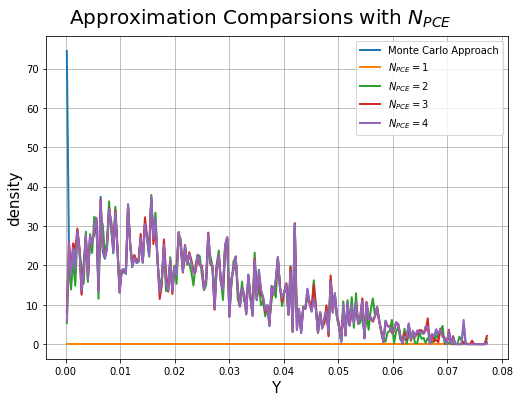

In [670]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 6));
ax.plot(t_range,kde_real(t_range),lw=2, label='Monte Carlo Approach')
for ii in range(4):
    ax.plot(t_range,kde_approx[ii](t_range),lw=2, label='$N_{PCE}=$'+str(ii+1))
ax.set_xlabel('Y',fontsize=15)
ax.set_ylabel('density',fontsize=15)
ax.grid(True)
ax.legend()
fig.suptitle('Approximation Comparsions with $N_{PCE}$',fontsize=20)
fig.tight_layout(pad=3.5)
fig.savefig(r"C:\DUKE\courses\Uncertainty Quantification\final project\N_PCE comparsion.jpg", dpi = 300)

In [671]:
mse=[]
for ii in range(4):
    mse.append(((Y_approx[i]-Y_real)**2).mean())

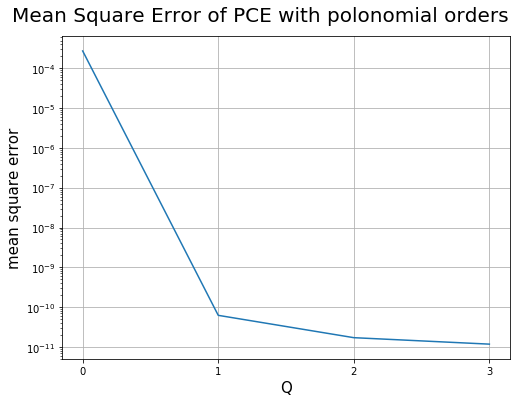

In [675]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 6));
ax.plot(mse)
ax.set_xlabel('Q',fontsize=15)
ax.set_ylabel('mean square error',fontsize=15)
ax.set_yscale('log')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.grid(True)
fig.suptitle('Mean Square Error of PCE with polonomial orders',fontsize=20)
fig.tight_layout(pad=3.5)
fig.savefig(r"C:\DUKE\courses\Uncertainty Quantification\final project\PCE mse.jpg", dpi = 300)